In [21]:
import joblib
import data_processing as dp
import model_evaluation as me
import torch
from torch import tensor
from models.mlp import MLP

# Test Subject

In [2]:
####################
# LOADING THE DATA #
####################
DATA_DIR = "../segmented_data/"
SUBJECTS = ['HH']
SCENES = ['FlatWalkStraight', 'FlatWalkCircular', 'FlatWalkStatic']
TRIALS = ('all')

gait_cycles = dp.read_gait_cycles(DATA_DIR, SUBJECTS, SCENES, TRIALS, drop_emgs=True)

Reading all trials of ['HH'].


In [3]:
#############
# FILTERING #
#############
df_filtered = dp.filter_together(gait_cycles)

Dropped BW jogging_4_badForcePlate.csv of subject HH.
Dropped Sidestepping normal_1.csv of subject HH.


In [4]:
######################
# FEATURE EXTRACTION #
######################
X_test = dp.extract_features(df_filtered)
Y_test = df_filtered[['Fx_l', 'Fy_l', 'Fz_l', 'Tz_l',
                      'Fx_r', 'Fy_r', 'Fz_r', 'Tz_r']]

Y_test = tensor(Y_test.to_numpy().reshape((-1, 8)), dtype=torch.float32)

In [ ]:
DIR = 'results/excl_emg/all/20240607-090124'

scaler = joblib.load(f'{DIR}/standard_scaler.pkl')
pca    = joblib.load(f'{DIR}/pca.pkl')
full_grf_estimator = MLP.load(DIR, 'Y')

MLP Y has 186 input neurons, [352, 342] hidden neurons and 8 output neurons.


In [17]:
# Perform PCA
X_scaled = scaler.transform(X_test.values)
X_pc = pca.transform(X_scaled)
# Convert to tensors
X_pc_tensor = tensor(X_pc, dtype=torch.float32)

In [18]:
Y_pred = full_grf_estimator(X_pc_tensor)

In [19]:
LABELS =  ['Fx_l', 'Fy_l', 'Fz_l', 'Tz_l', 'Fx_r', 'Fy_r', 'Fz_r', 'Tz_r']
nr_of_vars = Y_test.shape[1]

for i in range(nr_of_vars):
    print(LABELS[i])
    me.print_metrics(Y_test[:, i].reshape(-1, 1), Y_pred[:, i].reshape(-1, 1), scatterplot=False)

Fx_l
Performance on the test set:
NRMSE = 0.1040
r = 0.7476781337174876
Fy_l
Performance on the test set:
NRMSE = 0.0871
r = 0.8366659677949312
Fz_l
Performance on the test set:
NRMSE = 0.0580
r = 0.9769401975341034
Tz_l
Performance on the test set:
NRMSE = 0.1441
r = 0.4755976285370829
Fx_r
Performance on the test set:
NRMSE = 0.0965
r = 0.8082633360973602
Fy_r
Performance on the test set:
NRMSE = 0.0791
r = 0.8410166581740026
Fz_r
Performance on the test set:
NRMSE = 0.0537
r = 0.9811542497998355
Tz_r
Performance on the test set:
NRMSE = 0.1692
r = 0.4520225015394232


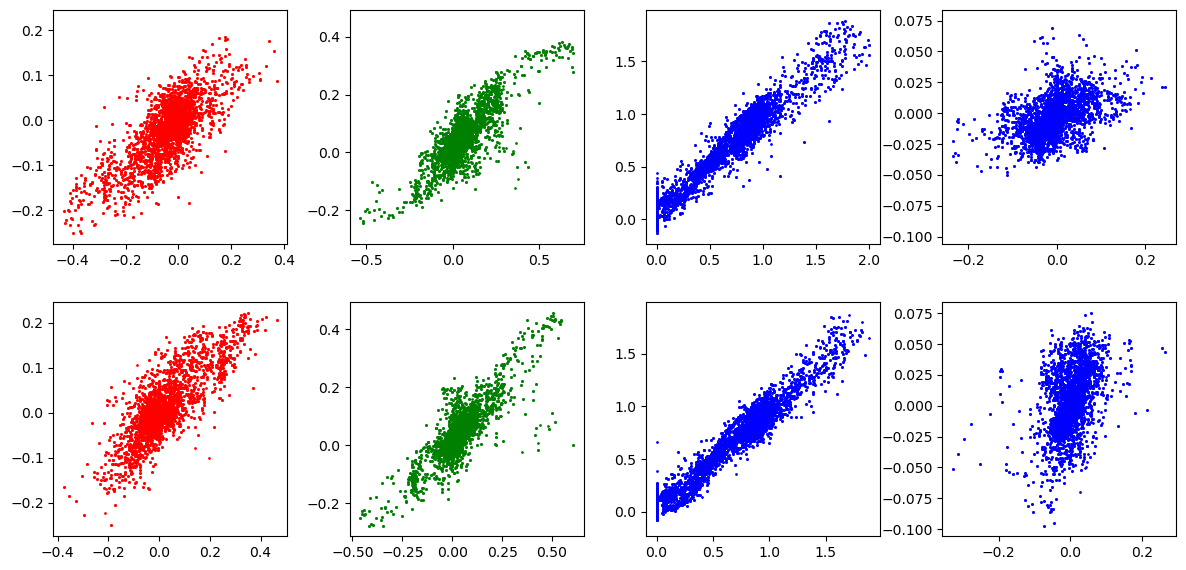

In [20]:
me.plot_correlations(Y_test, Y_pred)